In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

# 觀察漲跌股價與新聞數量的關係

In [2]:
%matplotlib inline
data_file = './News_stock_price/News_Stock_price.csv';
df = pd.read_csv(data_file)
#titles = list(df.columns)[1:]
#df = df.iloc[:,1:]
arr_date = df['Date']
arr_price = df['After_price'] - df['Now_price']
arr_ratio = arr_price / df['Now_price'] * 100

In [3]:
#plt.title('price')
#plt.plot(date1,price1)
#plt.scatter(date1,ratio1)
#plt.hist(ratio1)
#plt.xlabel('Riskiness')
#plt.ylabel('Expectation')
#plt.show()

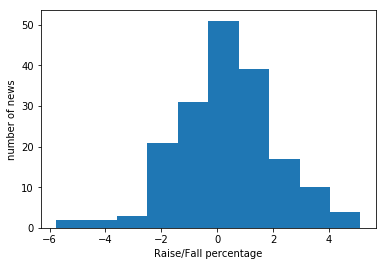

In [4]:
plt.hist(arr_ratio)
plt.xlabel('Raise/Fall percentage')
plt.ylabel('number of news')
plt.show()

# 從JSON檔取出標註詞彙

In [5]:
def get_token_by_ner(date):
    arr_token = []
    date = date.replace('-','')
    file_path = './NER_human_label/' + date + '.ann.json'
    if os.path.isfile(file_path):
        with open(file_path) as json_file:  
            data = json.load(json_file)
            for e in data['entities']:
                text = e['offsets'][0]['text']
                arr_token.append(text)
    else:
        print(file_path + ' does not exist.')
    return arr_token

# 篩出漲幅超過3%的新聞

In [6]:
threshold_p = 3
positive_words = []
for i,r in enumerate(arr_ratio):
    if r >= threshold_p:
        d = arr_date[i]
        token = get_token_by_ner(d)
        positive_words = positive_words + token
print(positive_words)

./NER_human_label/20190409.ann.json does not exist.
./NER_human_label/20190408.ann.json does not exist.
./NER_human_label/20190402.ann.json does not exist.
./NER_human_label/20181120.ann.json does not exist.
./NER_human_label/20181022.ann.json does not exist.
./NER_human_label/20181021.ann.json does not exist.
['半導體族群', '市值創新高', '傳承', '市場給予支持', '上漲', '市值', '創新高', '共治', '退休', '雙首長制', '平行共治制度', '劉德音', '魏哲家', '觀望', '營運', '成長', '貼息', 'ADR', '下跌', '跌幅', '開低', '貼息', '買超', '先進製程', '領先同業', '試產', '成長動能', '智慧型手機', '強敵', '先進製程', '領先同業', '拿下', '設計定案', 'tape-out', '風險試產', '創新', '進入市場', '市值', '破紀錄', '美國科技股', '多頭', 'ADR', '歷史新高', '攀高', '開盤', '過高點', '盤中', '歷史新高', '市值', '新高']


# 篩出跌幅超過3%的新聞

In [7]:
threshold_n = -3
negative_words = []
for i,r in enumerate(arr_ratio):
    if r <= threshold_n:
        d = arr_date[i]
        token = get_token_by_ner(d)
        negative_words = negative_words + token
print(negative_words)

./NER_human_label/20181129.ann.json does not exist.
./NER_human_label/20181020.ann.json does not exist.
./NER_human_label/20181019.ann.json does not exist.
./NER_human_label/20181018.ann.json does not exist.
./NER_human_label/20181017.ann.json does not exist.
./NER_human_label/20181004.ann.json does not exist.
['法說會', '外資圈', '7奈米製程', '現金股利', '資本支出', '營收季減']
